In [1]:
!pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966499 sha256=4e6e75d8c12300e4b7cd944cf1d5458e2f78bc2d974aae12034d1b7f4ee16db3
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7120 sha256=d243dbfd1b4ab83967654d319d815418de4f1eb763649e44801dfd7715398232
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8469 sha256=d835a3e1879f60678e7beecfe303abe72d9e4b104678c3da32a3c3d6b5b89207
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7

In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.7 MB/s eta 0:00:00


In [3]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from spellchecker import SpellChecker
import contractions as ct
import string
import re
# import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


#Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Load spaCy's English model
# nlp = spacy.load('en_core_web_sm')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import AutoModelForSequenceClassification,AutoTokenizer

In [5]:
df=pd.read_csv('/content/Collected Data.csv')

In [6]:
df.head()

,URL,review_rating,review_title,review_body
0,https://www.amazon.com/HBselect-Travel-Makeup-...,5,This is exactly what I wanted!,They originally shipped me the wrong color. I ...
1,https://www.amazon.com/HBselect-Travel-Makeup-...,5,Worked wonderfull,It was very nice looks and feel. It is very pr...
2,https://www.amazon.com/HBselect-Travel-Makeup-...,5,Great for travel and home 🎉,I travel frequently and have ordered several s...
3,https://www.amazon.com/HBselect-Travel-Makeup-...,4,"Mine is 2yrs old, just bought another to gift",I have the bag in camel and use it as a daily ...
4,https://www.amazon.com/HBselect-Travel-Makeup-...,5,The perfect gift,"I really like this makeup bag. When it's open,..."


In [7]:
df=df.drop(['URL','review_title'],axis=1)

In [8]:
df

,review_rating,review_body
0,5,They originally shipped me the wrong color. I ...
1,5,It was very nice looks and feel. It is very pr...
2,5,I travel frequently and have ordered several s...
3,4,I have the bag in camel and use it as a daily ...
4,5,"I really like this makeup bag. When it's open,..."
...,...,...
238,5,This is a nice large makeup/travel bag. It fit...
239,5,"She loves that it opens wide and flattens, hol..."
240,5,Very nice outside waterproof texture to this c...
241,5,"If you travel a lot, you likely can make use o..."


In [9]:
df['review_rating']=df['review_rating'].apply(lambda x: 1 if x>4 else 0)

In [10]:
df.review_rating.value_counts()

,count
review_rating,
1,181
0,62


In [11]:
def remove_duplicate(df):
    dup_row_num = df.duplicated().sum()

    if dup_row_num > 0:
        df.drop_duplicates(inplace=True)
        print(f"Dropped {dup_row_num} dupliacte rows from the dataset")
        print(f'Now the dataset shape is {df.shape}')
    else:
        print(f"There is no duplicate in the dataset")

    return df

In [12]:
df = remove_duplicate(df)

There is no duplicate in the dataset


In [13]:
def remove_null(df):
    null_row_num = df.isnull().sum().sum()

    if null_row_num > 0:
        df.dropna(inplace=True)
        print(f"Dropped {null_row_num} null rows from the dataset")
        print(f'Now the dataset shape is {df.shape}')
    else:
        print(f"There is no null values in the dataset")

    return df
df = remove_null(df)

There is no null values in the dataset


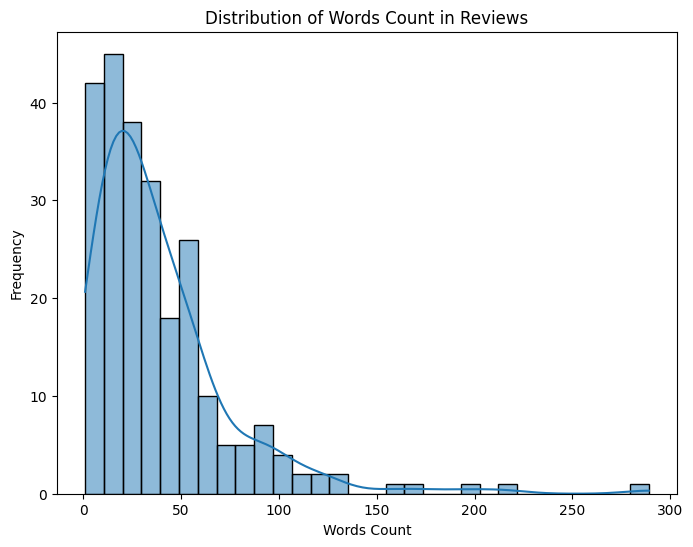

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['review_body'].apply(lambda x: len(str(x).split())), bins=30, kde=True)
plt.title('Distribution of Words Count in Reviews')
plt.xlabel('Words Count')
plt.ylabel('Frequency')
plt.show()

In [15]:
Emojis = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [16]:
spell = SpellChecker()
lemmatizer = WordNetLemmatizer()

In [18]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
import contractions as ct
# Download NLTK resources if not already present
#nltk.download('punkt')
##nltk.download('stopwords')
#nltk.download('wordnet')


# Import your Emojis dictionary (Assuming it's in a separate file or cell)
# from your_emoji_file import Emojis # replace with your actual file name if needed

# Function to clean and pre-process the review data
def preprocessing(df):
    df_corpus = []

    for i in df['review_body'].values:
        review = i

        # Expand contraction in text (e.g., can't → cannot)
        review = ct.fix(review)

        # Replace emojis with textual descriptions
        for emo in Emojis:
            review = re.sub(u'('+emo+')', '_'.join(Emojis[emo].replace(',', '').split()), review)

        # Remove HTML tags
        review = BeautifulSoup(review, "lxml").get_text()

        # Remove URLs and mentions
        review = re.sub(r'http\S+|@\S+', '', review)

        # Remove non-alphabetic characters
        review = re.sub("[^a-zA-Z]", ' ', review)

        # Lowercase
        review = review.lower()

        # Tokenization
        review = word_tokenize(review)

        # Spelling Correction (optional: this can be slow)
        review = [spell.correction(i) if spell.correction(i) else i for i in review]

        # Remove stopwords
        review = [word for word in review if word not in stopwords.words('english')]

        # Lemmatization (preferred over stemming)
        #review = [lemmatizer.lemmatize(word) for word in review]

        # Join tokens back to form the cleaned review text
        review = ' '.join(review)

        df_corpus.append(review)

    return df_corpus

# Call the preprocessing function and assign the results
df_corpus = preprocessing(df)

# Now, you can assign the cleaned reviews to your DataFrame
df['Cleaned_Review'] = df_corpus

In [19]:
df.head()

,review_rating,review_body,Cleaned_Review
0,1,They originally shipped me the wrong color. I ...,originally shipped wrong color let know sent c...
1,1,It was very nice looks and feel. It is very pr...,nice looks feel practical durables survived in...
2,1,I travel frequently and have ordered several s...,travel frequently ordered several styles cosme...
3,0,I have the bag in camel and use it as a daily ...,bag camel use daily travel bag fully loaded ma...
4,1,"I really like this makeup bag. When it's open,...",really like makeup bag open see everything eas...


In [21]:
df.to_csv('cleaned_collected_data.csv', index=False)
df=pd.read_csv('/content/cleaned_collected_data.csv')

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [27]:
output = AutoModelForSequenceClassification.from_pretrained('/content/gdrive/MyDrive/FineTunedModel/output')
tokenizer = AutoTokenizer.from_pretrained('/content/gdrive/MyDrive/FineTunedModel/output') # Changed 'outputt' to 'output'
cleaned_collected_dataset=df.Cleaned_Review.tolist()


In [29]:
texts = cleaned_collected_dataset
id2label = {0: 'NEGATIVE', 1: 'POSITIVE'}
results = []

for text in texts:
    input_ids = tokenizer.encode(text, return_tensors='pt')
    out = output(input_ids)
    preds = torch.nn.functional.softmax(out.logits, dim=-1)
    prob = torch.max(preds).item()
    ids = torch.argmax(preds).item()
    sentiment = id2label[ids]


    results.append((text, sentiment, prob))


for result in results:
    print(f"Text: {result[0]}, Sentiment: {result[0]}, Probability: {result[1]}")

Text: originally shipped wrong color let know sent correct one problem happy size color ease zipping number pockets, Sentiment: originally shipped wrong color let know sent correct one problem happy size color ease zipping number pockets, Probability: POSITIVE
Text: nice looks feel practical durables survived international trip made well, Sentiment: nice looks feel practical durables survived international trip made well, Probability: POSITIVE
Text: travel frequently ordered several styles cosmetics pouches hanging bags et find best solution finally found one holds brushes skincare makeup love zipper pocket smaller side pockets keep vanity everyday use well hesitate order ordered pink color great, Sentiment: travel frequently ordered several styles cosmetics pouches hanging bags et find best solution finally found one holds brushes skincare makeup love zipper pocket smaller side pockets keep vanity everyday use well hesitate order ordered pink color great, Probability: POSITIVE
Text: b

In [31]:
predicted_data=pd.DataFrame(results, columns=['reviews', 'sentiment', 'probability'])

In [32]:
predicted_data.head()

,reviews,sentiment,probability
0,originally shipped wrong color let know sent c...,POSITIVE,0.796802
1,nice looks feel practical durables survived in...,POSITIVE,0.981896
2,travel frequently ordered several styles cosme...,POSITIVE,0.987702
3,bag camel use daily travel bag fully loaded ma...,POSITIVE,0.963566
4,really like makeup bag open see everything eas...,POSITIVE,0.981861


In [33]:
predicted_data.to_csv('predicted_data.csv', index=False)